In [1]:
# import typical stuff
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc
import pickle

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import matplotlib.gridspec as gridspec
import SimilarityMatrixAnalysis as sm
from SplineEncodingModel import LinearRegressionSpline as spl


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
# load session database
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [3]:
# load favorite session - 4139265.5 last session
mouse = '4139265.5'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1410,4139265.5,10_02_2019,1,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.5\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...
1412,4139265.5,10_02_2019,3,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.5\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\10_02_2...
1439,4139265.5,12_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-12,G:\My Drive\VR_Data\TwoTower\4139265.5\12_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\12_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\12_02_2...
1462,4139265.5,15_02_2019,2,TwoTower_foraging,86,1,CA1,2019-02-15,G:\My Drive\VR_Data\TwoTower\4139265.5\15_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\15_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\15_02_2...
1481,4139265.5,17_02_2019,2,TwoTower_foraging,80,1,CA1,2019-02-17,G:\My Drive\VR_Data\TwoTower\4139265.5\17_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\17_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\17_02_2...
1501,4139265.5,19_02_2019,2,TwoTower_foraging,97,1,CA1,2019-02-19,G:\My Drive\VR_Data\TwoTower\4139265.5\19_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\19_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\19_02_2...
1519,4139265.5,21_02_2019,2,TwoTower_foraging,105,1,CA1,2019-02-21,G:\My Drive\VR_Data\TwoTower\4139265.5\21_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\21_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\21_02_2...
1528,4139265.5,22_02_2019,2,TwoTower_foraging,98,1,CA1,2019-02-22,G:\My Drive\VR_Data\TwoTower\4139265.5\22_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\22_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\22_02_2...
1534,4139265.5,23_02_2019,2,TwoTower_foraging,96,1,CA1,2019-02-23,G:\My Drive\VR_Data\TwoTower\4139265.5\23_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\23_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\23_02_2...
1539,4139265.5,24_02_2019,2,TwoTower_foraging,90,1,CA1,2019-02-24,G:\My Drive\VR_Data\TwoTower\4139265.5\24_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.5\24_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.5\24_02_2...


In [4]:
sess = df_mouse.iloc[-1]

In [5]:
VRDat,C, S, A = pp.load_scan_sess(sess)
S/=15.46
Ssm = sp.ndimage.filters.gaussian_filter1d(S,5,axis=0)

num aberrant ttls 0.0
36583 (36583,) (36583, 21) 124384


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [6]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,
                                                                        VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10)
C_trial_mat = u.make_pos_bin_trial_matrices(C,VRDat['pos']._values,
                                                                        VRDat['tstart']._values,VRDat['teleport']._values,bin_size=10,mat_only=True)
effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']
effMorph = (effMorph+.25)/1.5

16.461961943196314
14.924926438613054
6.554507305827774
5.084232832431894
4.74194659144712
4.283052261748683
4.36084106489614
3.697006395670953
16.461961943196314
14.924926438613054
6.554507305827774
5.084232832431894
4.74194659144712
4.433267481173154
4.572506282583988
4.023268910326323
2


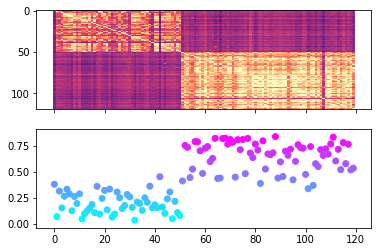

In [7]:
# compute similarity matrix and cluster
S_trial_mat[np.isnan(S_trial_mat)]=0
S_trial_mat = sp.ndimage.filters.gaussian_filter1d(S_trial_mat,1,axis=1)
S_tmat = np.reshape(S_trial_mat,[S_trial_mat.shape[0],-1])
S_tmat = S_tmat/np.linalg.norm(S_tmat,ord=2,axis=-1)[:,np.newaxis]
S_t_rmat = np.matmul(S_tmat,S_tmat.T)


_labels = sm.cluster_simmat(S_t_rmat)
nc = np.unique(_labels).shape[0]
clustmean = np.array([effMorph[_labels==i].mean() for i in range(nc)])
clusterOrder = np.argsort(clustmean)
labels = np.zeros(effMorph.shape)

for i,cl in enumerate(clusterOrder.tolist()):
    labels[_labels==cl]=i
#print(clusterOrder)

clustsort = sm._sort_clusters(sm.cluster_simmat(S_t_rmat),effMorph)
C_csort = sm._sort_simmat(S_t_rmat,clustsort)
print(nc)

f,ax = plt.subplots(2,1,sharex=True)
ax[0].imshow(C_csort,aspect='auto',cmap='magma',vmax = np.percentile(C_csort,95),vmin=0.1)
ax[1].scatter(np.arange(effMorph.shape[0]),effMorph[clustsort],c=effMorph[clustsort],cmap='cool')

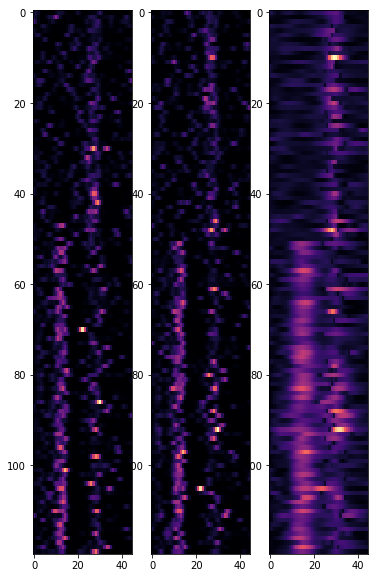

In [8]:
# pick favorite cell that shows this two-state response
favcell = 94

f,ax = plt.subplots(1,3,figsize=[6,10])
ax[0].imshow(S_trial_mat[np.argsort(effMorph),:,favcell],aspect='auto',cmap='magma')
ax[1].imshow(S_trial_mat[clustsort,:,favcell],aspect='auto',cmap='magma')
ax[2].imshow(C_trial_mat[clustsort,:,favcell],aspect='auto',cmap='magma')



In [9]:
print(labels,effMorph)

[0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1.] [0.37904827 0.65797937 0.25663936 0.69819947 0.4539052  0.03295433
 0.59462093 0.43836695 0.83815189 0.68185419 0.24836537 0.66358135
 0.67122635 0.52548046 0.7973255  0.18023294 0.15254881 0.38721161
 0.23773718 0.3045239  0.7091123  0.07710848 0.76676277 0.15932829
 0.04666853 0.21405084 0.63534314 0.36045722 0.68004314 0.82065095
 0.48076829 0.06658154 0.80987182 0.71686393 0.42182313 0.2633856
 0.59989184 0.76002723 0.76447655 0.12333669 0.57736625 0.19320036
 0.28611107 0.7803664  0.51995187 0.04429134 0.09387014 0.71572059
 0.60331241 0.83273105 0.14783398 0.1828976  0.76685811 0.10625951
 0.66888467 0.51657105 0.7201188

In [10]:
# fit vanilla spline gamma glm to two states
mdl = spl.EncodingModel()

pos = VRDat.pos._values
em = VRDat.morph._values + VRDat.towerJitter._values + VRDat.wallJitter._values + VRDat.bckgndJitter._values
em += .25
em/=1.5

# mask = (pos<450) & (pos>0) 
# X = mdl.make_design_matrix(pos[mask],em[mask])

mask = (pos<450) & (pos>0) & (em>.45)
X=mdl.pos_spline(pos[mask])

mdl.fit_poisson(X,C[mask,favcell]/15.46/10.)#,alpha=.1)
yhat = mdl.predict_poisson(X)




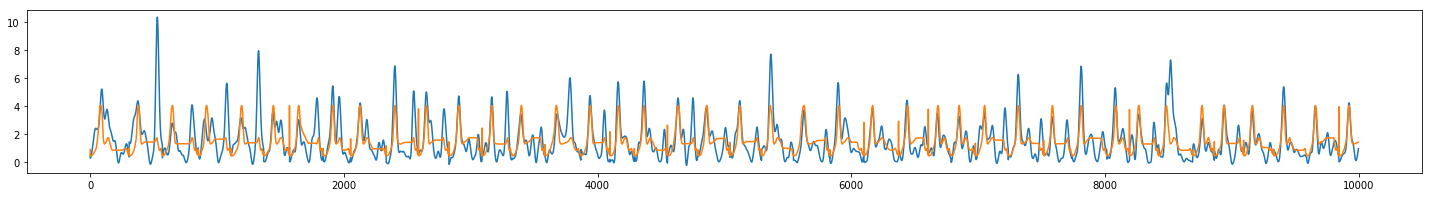

In [11]:
f,ax = plt.subplots(figsize=[25,3])
s = S[mask,favcell]
ssm = Ssm[mask,favcell]
c = C[mask,favcell]/15.46/10
# ax.plot(s[:5000])
# ax.plot(ssm[:5000])
ax.plot(c[:10000])
ax.plot(yhat[:10000])
# ax.set_ylim([0,4])

In [12]:
pos_filt = np.linspace(0.001,449.999)
# morph_filt = np.linspace(.001,.999,num=500)
# x_filt = mdl.pos_morph_spline()
x_filt = mdl.pos_spline(pos_filt)
filt = mdl.predict_poisson(x_filt)

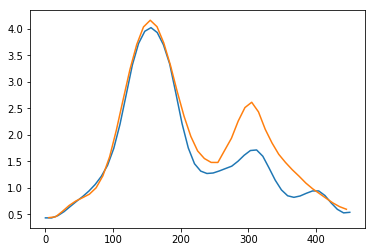

In [13]:
f,ax = plt.subplots()
ax.plot(pos_filt,filt)

ax.plot(centers,C_trial_mat[effMorph>.45,:,favcell].mean(axis=0)/15.46/10)

In [14]:
# fit hmm-glm 

from tglm import MultiDimTuningCurve, TuningCurveHMM
import numpy.random as npr
from scipy.ndimage import gaussian_filter, gaussian_filter1d
from scipy.interpolate import RegularGridInterpolator
from tglm.utils import softmax


In [15]:
model = MultiDimTuningCurve(n_bins=21,backend="scipy",disp=True)
mask = (pos<450) & (pos>0) 
model.fit(pos[mask].reshape([-1,1]),C[mask,favcell]/154.6)

c:\users\mplitt\tensor-glm\tglm\fullrank.py:122: OptimizeWarning: Unknown solver options: tol
  options=dict(disp=self.disp, tol=self.tol),


MultiDimTuningCurve(alphas=0.0, backend='scipy', bounds_error=False,
          disp=True, interpolation='linear', n_bins=21, tol=0.001,
          use_hessian=False)

(21,)


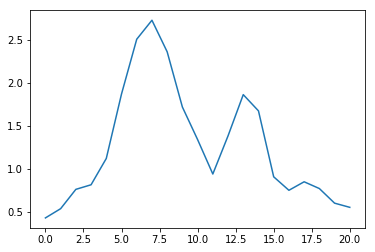

In [16]:
print(model.ygrid_.shape)
f,ax = plt.subplots()
ax.plot(np.exp(model.ygrid_))

In [89]:
model = TuningCurveHMM(n_states=5, n_bins=21, disp=True, iterations=30)
model.fit(pos[mask].reshape([-1,1]),C[mask,:500].reshape([-1,500])/154.6)

Iteration 29 , LL = -10625883.893571692: 100%|███████████████████████████████████████| 500/500 [00:22<00:00, 22.00it/s]


In [75]:
print(model.log_stateprobs.shape)

(28819, 2)


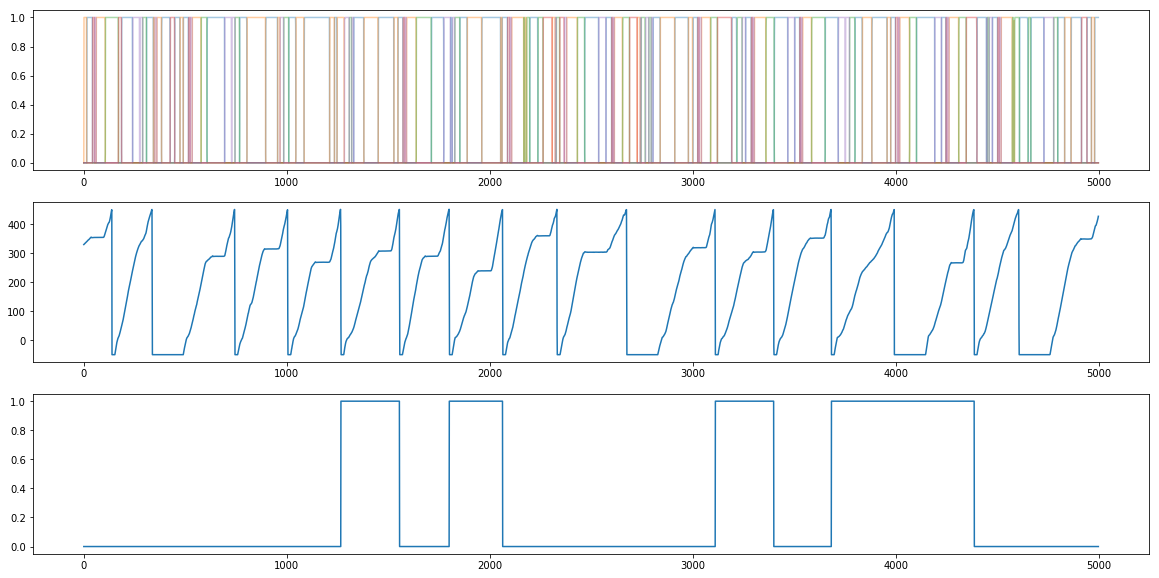

In [95]:
f,ax = plt.subplots(3,1,figsize=[20,10])
for c in range(model.log_stateprobs.shape[1]):
    ax[0].plot(np.exp(model.log_stateprobs[5000:10000,c]-np.amax(model.log_stateprobs[5000:10000,c])),alpha=.4)
ax[2].plot(np.round(em[5000:10000]))
ax[1].plot(pos[5000:10000])
